In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,  ConfusionMatrixDisplay
from matplotlib.pylab import rcParams

dataframes = {
    'mean': pd.read_csv('imputed/mean.csv'),
    'median': pd.read_csv('imputed/median.csv'),
    'mode': pd.read_csv('imputed/mode.csv'),
    'KNN': pd.read_csv('imputed/KNN.csv'),
    'MICE': pd.read_csv('imputed/MICE.csv'),
    'iterative': pd.read_csv('imputed/iterative.csv'),
}


# Decision tree

In [110]:
from util.functions import train

model = DecisionTreeClassifier()

results = train(model)

    

learning with mean imputed data
learning with median imputed data
learning with mode imputed data
learning with KNN imputed data
learning with MICE imputed data
learning with iterative imputed data


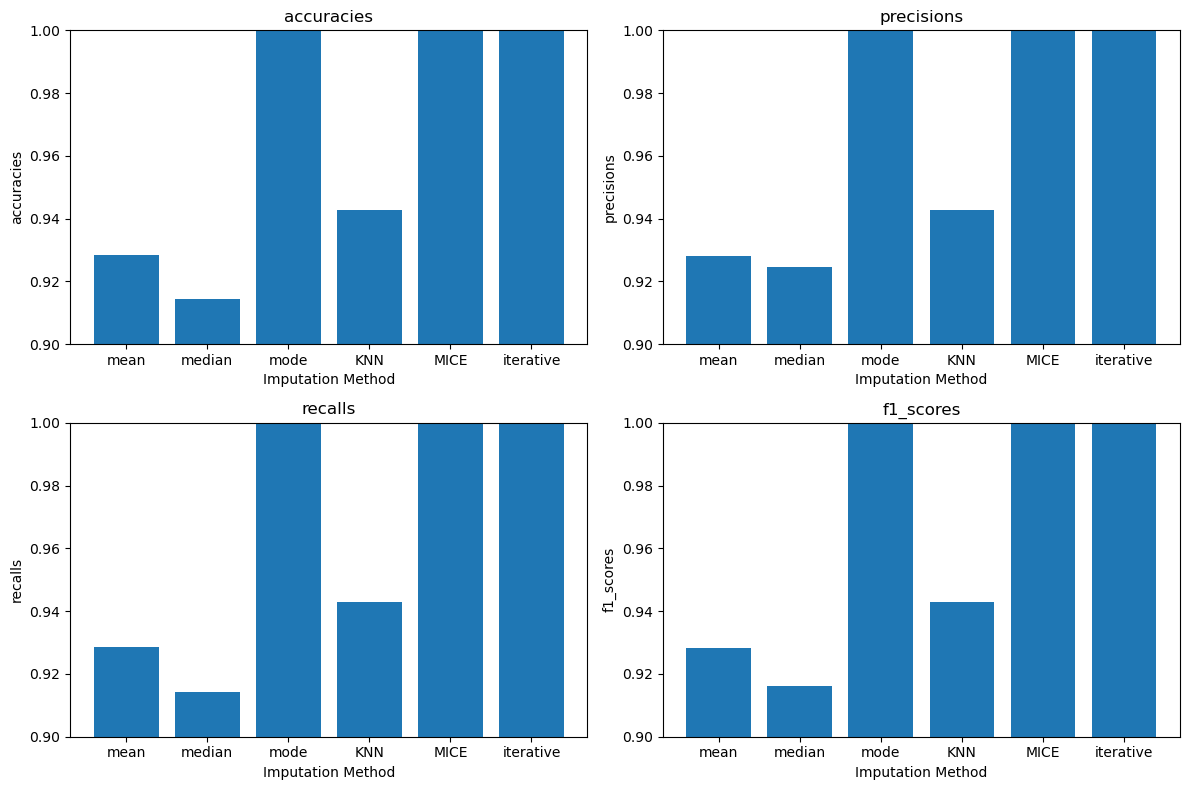

In [111]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])
    

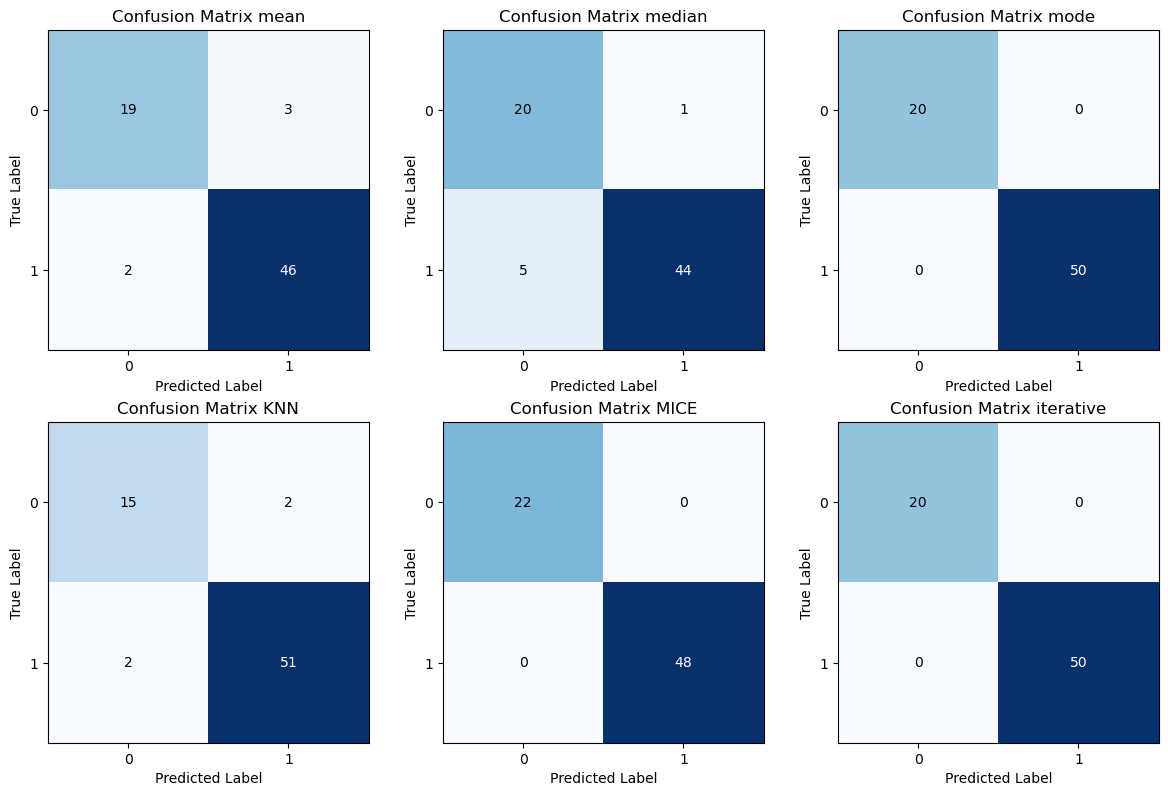

In [112]:
from util.functions import plot_confusion_matrices
plot_confusion_matrices(results['confusion_matrices'])

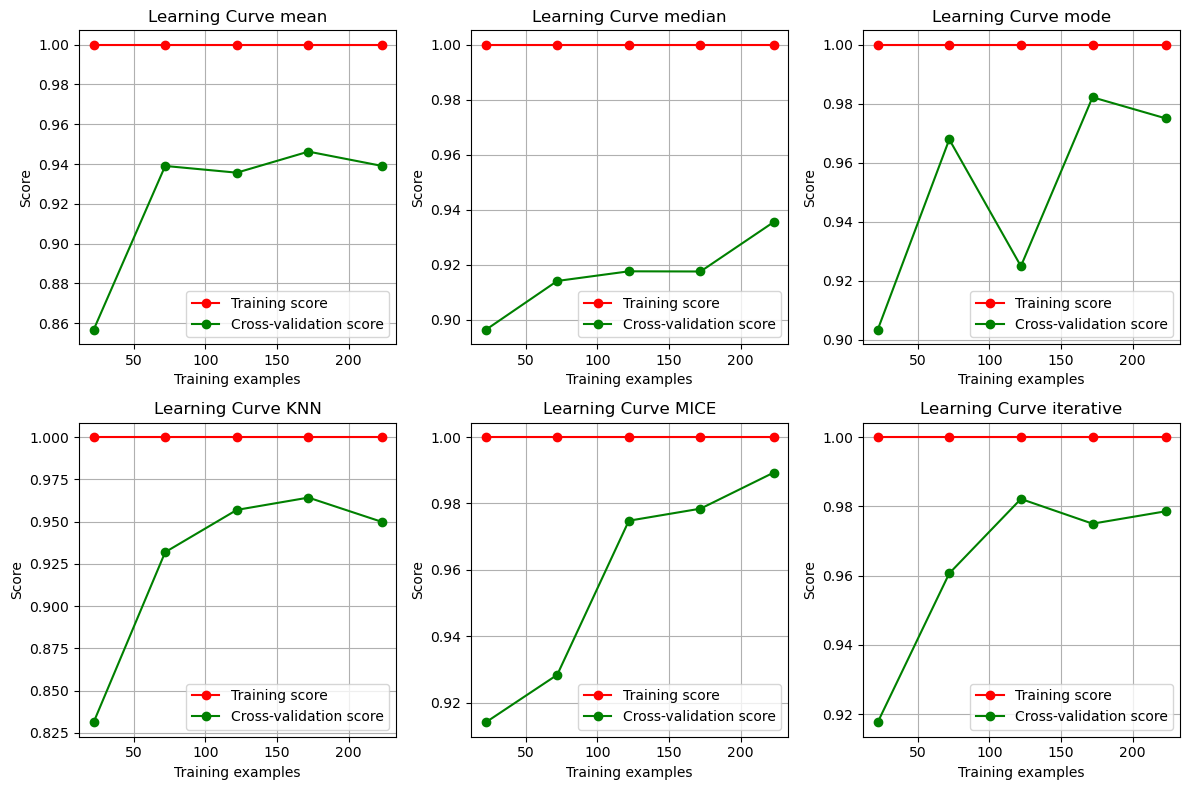

In [113]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

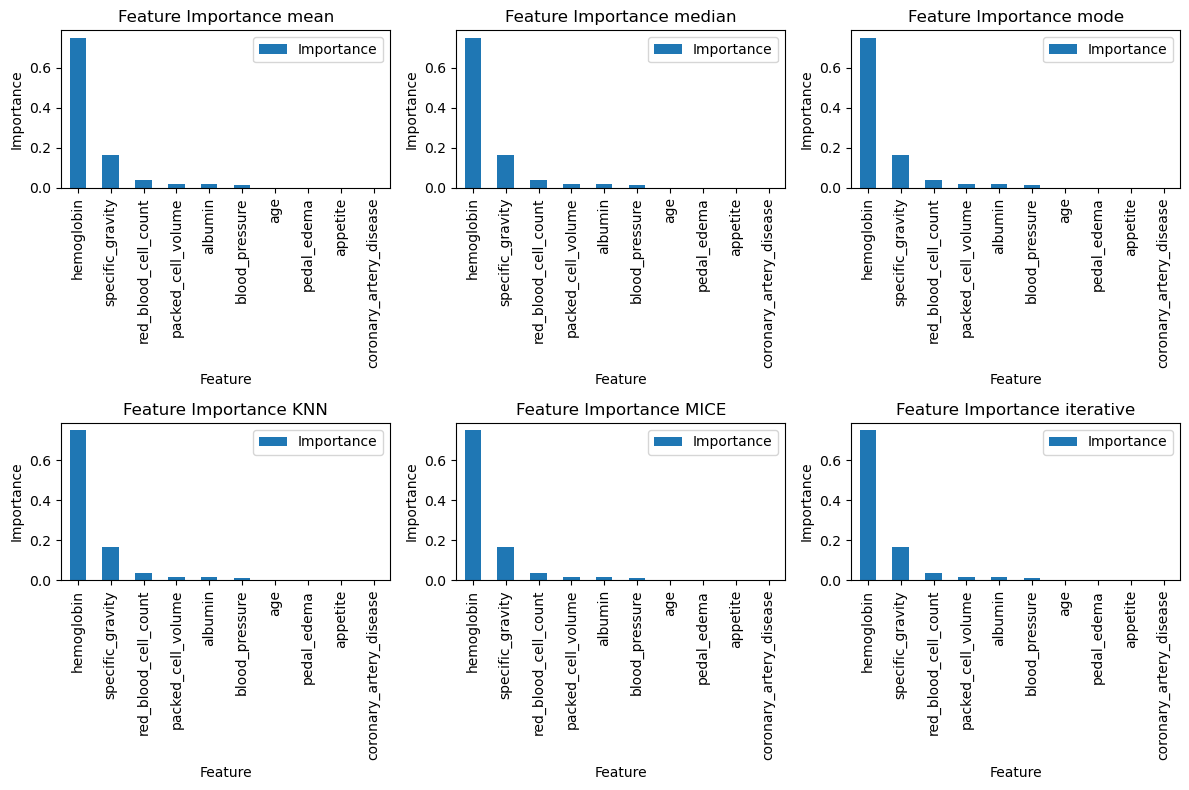

In [114]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
feature_importances = {}
for (name, model) in results['models'].items():
    feature_importances[name] = pd.DataFrame(
        model.feature_importances_, index=dataframes['mean'].drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)

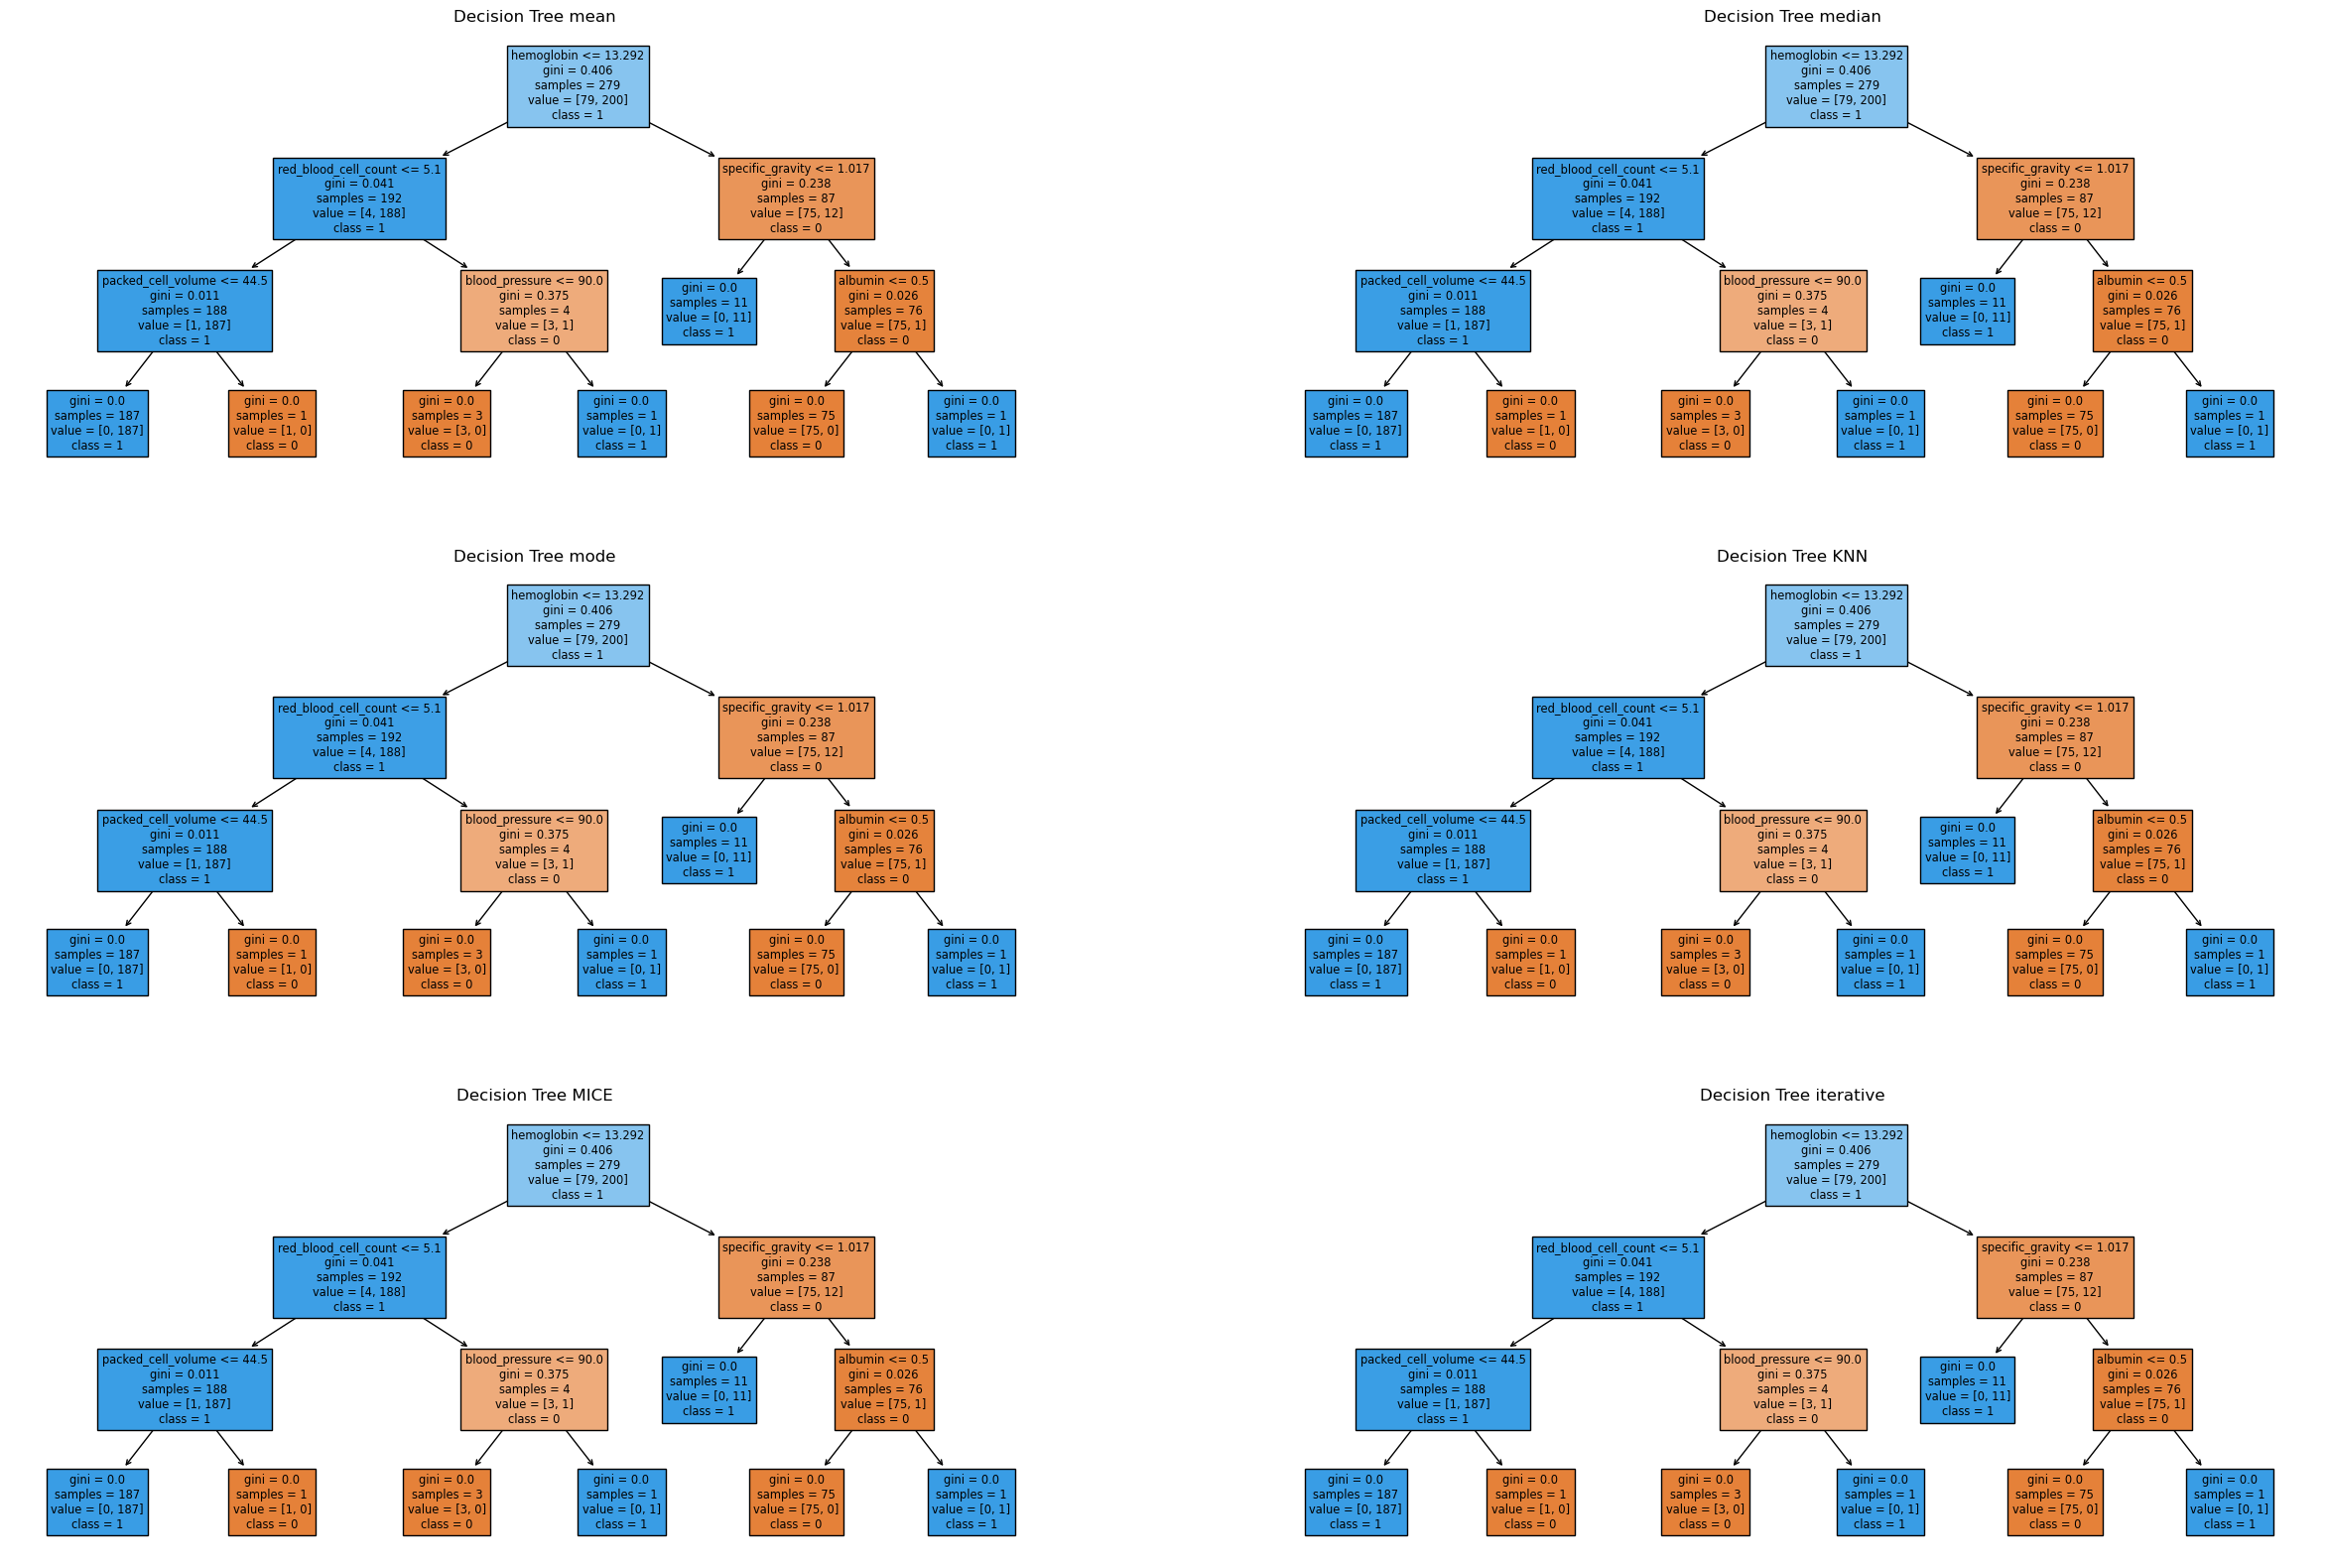

In [115]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

for i, (name, model) in enumerate(results['models'].items()):
    plot_tree(model, ax=axs.flat[i], feature_names=dataframes[name].drop(columns=['class']).columns, class_names=['0', '1'], filled=True)
    axs.flat[i].set_title(f'Decision Tree {name}')